In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from matplotlib.ticker import MaxNLocator
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=pd.read_csv('customer_segmentation.csv')

In [3]:
df.head(2240)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## replace mean salary null value with mean of salary

In [5]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

C:\Users\tp338\AppData\Local\Temp\ipykernel_23872\2923762628.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].mean(), inplace=True)


In [6]:
df.drop(columns=['ID'], inplace=True)

## Convert customer date to Date year

In [7]:
df['Dt_year_customer'] = df['Dt_Customer'].apply(lambda x:x.split('-')[2])

In [8]:
df['Dt_year_customer']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_year_customer, Length: 2240, dtype: object

In [9]:
df['Dt_Customer'].isna().sum()

np.int64(0)

In [10]:
df.shape

(2240, 29)

In [11]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year_customer
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,2012
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2014
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,2013
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,2014
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,2014


## drop date customer

In [12]:
df.drop(columns=['Dt_Customer'], inplace=True)

In [13]:
x_cat=df.select_dtypes(include=['object']).columns.tolist()
x_num=df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [14]:
x_num

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [15]:
process=ColumnTransformer(
    transformers=[
        ('cat',Pipeline([
            ('onehot',OneHotEncoder(sparse_output=True, handle_unknown='ignore')),
            
        ]), x_cat),
        ('num',Pipeline([
            ('scalar',StandardScaler())
        ]),x_num)
    ]
)

In [16]:
pipe=Pipeline(steps=[
    ('process',process),
    
])

In [17]:
df=pipe.fit_transform(df)

In [18]:
df=pd.DataFrame(df, columns=pipe.named_steps['process'].get_feature_names_out())

In [19]:
df.head()

,cat__Education_2n Cycle,cat__Education_Basic,cat__Education_Graduation,cat__Education_Master,cat__Education_PhD,cat__Marital_Status_Absurd,cat__Marital_Status_Alone,cat__Marital_Status_Divorced,cat__Marital_Status_Married,cat__Marital_Status_Single,...,num__NumWebVisitsMonth,num__AcceptedCmp3,num__AcceptedCmp4,num__AcceptedCmp5,num__AcceptedCmp1,num__AcceptedCmp2,num__Complain,num__Z_CostContact,num__Z_Revenue,num__Response
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


In [20]:
df.columns

Index(['cat__Education_2n Cycle', 'cat__Education_Basic',
       'cat__Education_Graduation', 'cat__Education_Master',
       'cat__Education_PhD', 'cat__Marital_Status_Absurd',
       'cat__Marital_Status_Alone', 'cat__Marital_Status_Divorced',
       'cat__Marital_Status_Married', 'cat__Marital_Status_Single',
       'cat__Marital_Status_Together', 'cat__Marital_Status_Widow',
       'cat__Marital_Status_YOLO', 'cat__Dt_year_customer_2012',
       'cat__Dt_year_customer_2013', 'cat__Dt_year_customer_2014',
       'num__Year_Birth', 'num__Income', 'num__Kidhome', 'num__Teenhome',
       'num__Recency', 'num__MntWines', 'num__MntFruits',
       'num__MntMeatProducts', 'num__MntFishProducts', 'num__MntSweetProducts',
       'num__MntGoldProds', 'num__NumDealsPurchases', 'num__NumWebPurchases',
       'num__NumCatalogPurchases', 'num__NumStorePurchases',
       'num__NumWebVisitsMonth', 'num__AcceptedCmp3', 'num__AcceptedCmp4',
       'num__AcceptedCmp5', 'num__AcceptedCmp1', 'num__Accep

In [21]:
df.shape

(2240, 41)

In [64]:
K_RANGE = list(range(2, 110))  # silhouette needs k>=2
inertias = []
sil_scores = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(df)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(df, labels))

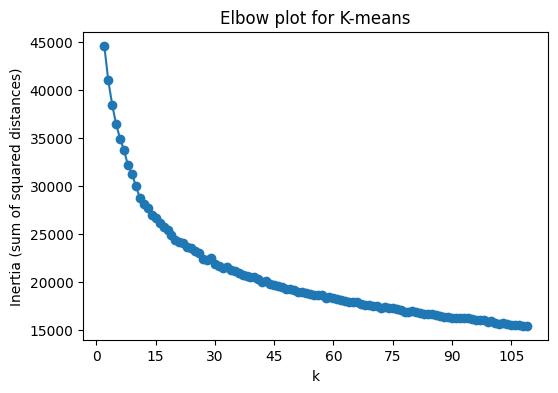

In [65]:
plt.figure(figsize=(6,4))
plt.plot(K_RANGE, inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow plot for K-means")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


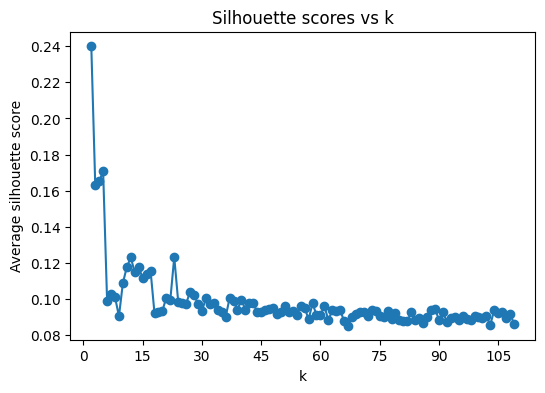

In [66]:
plt.figure(figsize=(6,4))
plt.plot(K_RANGE, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Average silhouette score")
plt.title("Silhouette scores vs k")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [67]:
best_k = K_RANGE[int(np.argmax(sil_scores))]
print("Chosen k (by silhouette):", best_k)


Chosen k (by silhouette): 2


In [68]:
kmeans = KMeans(n_clusters=best_k, n_init=25, random_state=42)
km_labels = kmeans.fit_predict(df)


In [73]:
agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward", metric="euclidean")
agg_labels = agg.fit_predict(df)

In [27]:
x=df.iloc[:,:]
km=KMeans(n_clusters=40, random_state=42)
y=km.fit_predict(x)

In [40]:
ls = [x[y == i].shape[0] for i in range(0, 40)]

In [46]:
min(ls)

1

In [77]:
def cluster_profile_table(labels, features_df):
    prof = features_df.copy()
    prof["Cluster"] = labels
    return prof.groupby("Cluster").agg(["mean", "median", "std", "count"])

km_prof = cluster_profile_table(km_labels, pd.DataFrame(df, columns=df.columns))
agg_prof = cluster_profile_table(agg_labels, pd.DataFrame(df, columns=df.columns))

In [78]:
display(km_prof.round(2))
display(agg_prof.round(2))


cat__Education_2n Cycle                    cat__Education_Basic  \
                           mean median   std count                 mean   
Cluster                                                                   
0                          0.10    0.0  0.29  1360                 0.04   
1                          0.08    0.0  0.28   880                 0.00   

                           cat__Education_Graduation         ...  \
        median   std count                      mean median  ...   
Cluster                                                      ...   
0          0.0  0.19  1360                      0.48    0.0  ...   
1          0.0  0.03   880                      0.53    1.0  ...   

        num__Z_CostContact       num__Z_Revenue                    \
                       std count           mean median  std count   
Cluster                                                             
0                      0.0  1360            0.0    0.0  0.0  1360   
1                      0.0   880            0.0    0.0  0.0   880   

        num__Response                     
                 mean median   std count  
Cluster                                   
0               -0.15  -0.42  0.82  1360  
1                0.24  -0.42  1.19   880  

[2 rows x 164 columns]

cat__Education_2n Cycle                    cat__Education_Basic  \
                           mean median   std count                 mean   
Cluster                                                                   
0                          0.07    0.0  0.26   913                 0.00   
1                          0.10    0.0  0.30  1327                 0.04   

                           cat__Education_Graduation         ...  \
        median   std count                      mean median  ...   
Cluster                                                      ...   
0          0.0  0.03   913                      0.52    1.0  ...   
1          0.0  0.20  1327                      0.49    0.0  ...   

        num__Z_CostContact       num__Z_Revenue                    \
                       std count           mean median  std count   
Cluster                                                             
0                      0.0   913            0.0    0.0  0.0   913   
1                      0.0  1327            0.0    0.0  0.0  1327   

        num__Response                     
                 mean median   std count  
Cluster                                   
0                0.18  -0.42  1.15   913  
1               -0.12  -0.42  0.86  1327  

[2 rows x 164 columns]

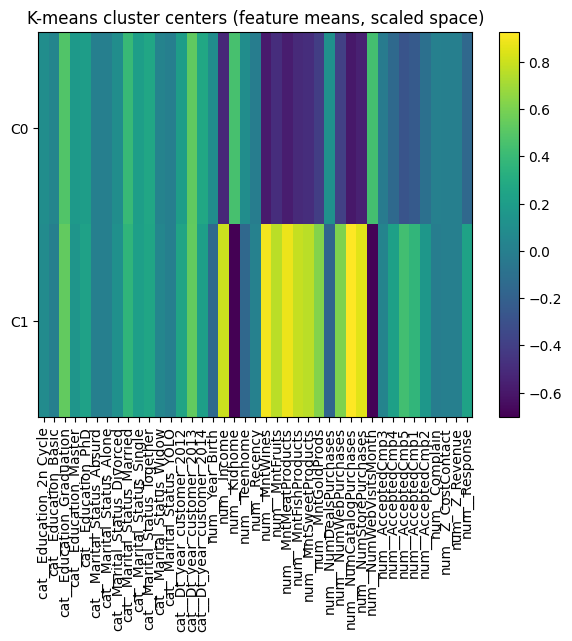

In [79]:
km_means = pd.DataFrame(df, columns=df.columns).assign(Cluster=km_labels)\
    .groupby("Cluster").mean(numeric_only=True)
fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(km_means.values, aspect='auto')
ax.set_yticks(range(km_means.shape[0]))
ax.set_yticklabels([f"C{c}" for c in km_means.index])
ax.set_xticks(range(km_means.shape[1]))
ax.set_xticklabels(km_means.columns, rotation=90)
ax.set_title("K-means cluster centers (feature means, scaled space)")
fig.colorbar(im, ax=ax)
plt.show()

In [80]:
ari = adjusted_rand_score(km_labels, agg_labels)
print(f"Adjusted Rand Index (K-means vs Agglomerative): {ari:.3f}")

Adjusted Rand Index (K-means vs Agglomerative): 0.652


In [81]:
ct = pd.crosstab(km_labels, agg_labels, rownames=['KMeans'], colnames=['Agglomerative'])
display(ct)

Agglomerative,0,1
KMeans,,
0,124,1236
1,789,91


In [83]:
def name_by_top_feature(means_df, feature_priority=None):
    if feature_priority is None:
        feature_priority = list(means_df.columns)
    names = {}
    for c in means_df.index:
        top = means_df.loc[c, feature_priority].sort_values(ascending=False).index[0]
        names[c] = f"High-{top.replace('_',' ')}"
    return names

priority = [c for c in km_means.columns if any(k in c.lower() for k in ("income","spend","age","score","purchases"))] + list(km_means.columns)
km_names = name_by_top_feature(km_means, priority)
print("Suggested K-means labels:", km_names)

# Attach final labels back to the original rows for export if you want
raw = pd.read_csv('customer_segmentation.csv')
out = raw.copy()
out["KMeans_Cluster"] = km_labels
out["Agglo_Cluster"] = agg_labels
out.head()

Suggested K-means labels: {0: 'High-cat  Dt year customer 2013', 1: 'High-num  NumCatalogPurchases'}


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,KMeans_Cluster,Agglo_Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,0,1
